In [1]:
from implementations import *
from helpers import *
import numpy as np
import matplotlib.pyplot as plt

## Load the data ###

In [2]:
data_path='./dataset_to_release/'
train_data_path="./dataset_to_release/x_train.csv"
test_data_path="./dataset_to_release/x_test.csv"

In [3]:
x_train, x_test, y_train, train_ids, test_ids=load_csv_data_all(data_path, sub_sample=False)

In [4]:
# change the label -1 by 0
y_train=np.where(y_train==-1, 0, y_train)

## Data Preprocessing

In [5]:
# Handeling the missing values

def replace_nan_by_mean(data):
    ''' function that handels the missing values by replacing them with the column means'''
    nan_indices = np.isnan(data)
    column_means = np.nanmean(data, axis=0)
    data[nan_indices] = np.take(column_means, np.where(nan_indices)[1])
    return data


data_train = replace_nan_by_mean(x_train)


In [175]:
features_to_keep = ["_AGE80", "_AGE65YR", "_AGEG5YR", "_AGE_G", "_AIDTST3", "_ASTHMS1", "_BMI5", "_BMI5CAT",
                     "_CASTHM1", "_CHLDCNT", "_CHOLCHK", "_DRDXAR1", "_DRNKWEK", "_FLSHOT6", "_FRT16", "_FRTLT1", "_FRTRESP", "_FRUITEX", "_FRUTSUM", "_HCVU651",
                      "_LMTACT1", "_LMTSCL1", "_LMTWRK1", "_LTASTH1", "_MINAC11", "_MINAC21", 
                       "_MISFRTN", "_MISVEGN", "_PA30021", "_PA150R2", "_PACAT1", "_PAINDX1", 
                       "_PASTAE1", "_PASTRNG", "_PNEUMO2",
                       "_RFBING5", "_RFBMI5", "_RFCHOL", "_RFDRHV5", "_RFHLTH", "_RFHYPE5", "_RFSMOK3", 
                       "_SMOKER3", "_TOTINDA", "_VEG23", "_VEGESUM", "_VEGETEX", "_VEGLT1", "_VEGRESP"]

In [177]:
len(features_to_keep)

49

In [9]:
# Secode version of data filtering, remove 9 more columns
def filtering(data,data_path):
    columns = extract_first_line(data_path).split(',')
    columns.pop(0)
    filtered_columns = [col for col in columns if col in features_to_keep]
    indices_to_keep = [columns.index(c) for c in filtered_columns]
    #print(len(indices_to_keep))

    data_f = data[:, indices_to_keep]
    return(data_f)

In [87]:
data_train_filtered=filtering(data_train, train_data_path)

In [88]:
data_train_filtered.shape

(328135, 54)

In [172]:
data_train_filtered[15]

array([1.00000000e+00, 7.79554120e-01, 1.50573713e+03, 2.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 1.48864715e+00,
       1.00000000e+00, 1.00000000e+00, 3.00000000e+00, 2.00000000e+00,
       1.00000000e+00, 5.00000000e+00, 1.00000000e+00, 4.40000000e+01,
       3.00000000e+00, 2.21500000e+01, 2.00000000e+00, 1.00000000e+00,
       3.00000000e+00, 4.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.74000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 8.40000000e+02,
       2.10000000e+02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 2.00000000e+00, 2.00000000e+00,
       3.00000000e+00, 3.00000000e+00, 4.00000000e+00, 2.28990981e+00,
       2.40679360e+00, 1.00000000e+00])

(array([240617.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  34419.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  30346.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12905.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,   4752.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,   2369.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

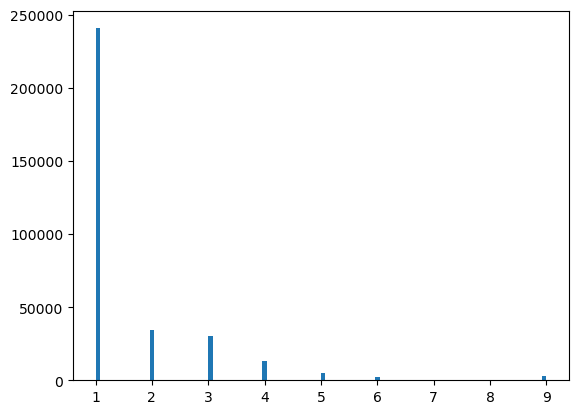

In [170]:
plt.hist(data_train_filtered[:,20], bins=100, range=None)

In [90]:
# standardization of the data
def standardize(data):
    small_value=1*10**(-9)
    mean=np.mean(data, axis=0)
    std=np.std(data, axis=0)+small_value
    return((data - mean) / (std))

In [91]:
data_train_standard=standardize(data_train_filtered)

In [92]:
# feature augmentation
def feature_expansion(data, degree):
    augmented_features=[]
    for i in range(data.shape[1]):
        feature=data[:,i]
        augmented_feature=build_poly(feature, degree)
        augmented_features.append(augmented_feature)

    # Stack the augmented features horizontally
    augmented_data = np.hstack(augmented_features)
    return(augmented_data)

   

In [135]:
def apply_model(test, model):
    pred=(sigmoid(test.dot(model))>=0.2).astype(int)
    return(pred)

In [143]:
def apply_model_2(test, model, thresh):
    pred=(sigmoid(test.dot(model))>=thresh).astype(int)
    return(pred)

# Balance the data

In [94]:
def undersample(X, y, majority_class_label):
    # Identify indices of majority and minority classes
    majority_indices = np.where(y == majority_class_label)[0]
    minority_indices = np.where(y != majority_class_label)[0]

    # Determine the number of samples in the minority class
    num_minority_samples = len(minority_indices)

    # Randomly select a subset of the majority class indices
    undersampled_majority_indices = np.random.choice(majority_indices, num_minority_samples, replace=False)

    # Combine minority class indices with the undersampled majority class indices
    undersampled_indices = np.concatenate([undersampled_majority_indices, minority_indices])

    # Obtain the undersampled dataset
    X_undersampled = X[undersampled_indices]
    y_undersampled = y[undersampled_indices]

    return X_undersampled, y_undersampled

In [95]:
x_undersampled, y_undersampled =undersample(data_train_standard, y_train, 0)

(array([28975.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 28975.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

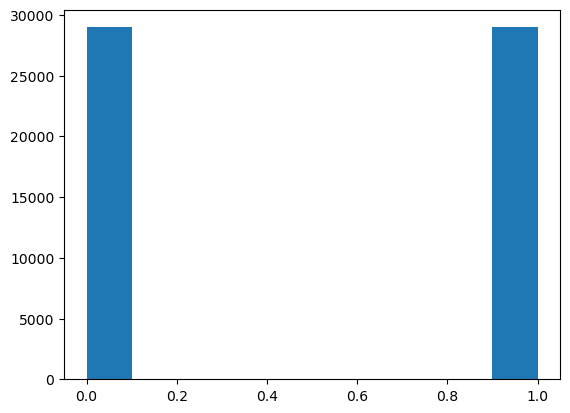

In [96]:
plt.hist(y_undersampled)

In [97]:
x_undersampled.shape

(57950, 54)

## Cross-Validation

In [35]:
def compute_f1_score(true_labels, predicted_labels):
    """
    Computes the F1 score for a classification model using NumPy.

    Parameters:
    true_labels (numpy.ndarray): True labels for the data.
    predicted_labels (numpy.ndarray): Predicted labels from the model.

    Returns:
    f1 (float): The F1 score.
    """
    true_positive = np.sum(np.logical_and(true_labels == 1, predicted_labels == 1))
    false_positive = np.sum(np.logical_and(true_labels == 0, predicted_labels == 1))
    false_negative = np.sum(np.logical_and(true_labels == 1, predicted_labels == 0))
    
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return f1

In [26]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold.

    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold

    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval : (k + 1) * interval] for k in range(k_fold)]
    
    return np.array(k_indices)

In [27]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    """

    # ***************************************************
    # get k'th subgroup in test, others in train:
    train_idx=np.reshape(k_indices[[i for i in range(len(k_indices)) if i!=k]], -1)
    test_idx=k_indices[k]

    x_train=x[train_idx,:]
    print(x_train.shape)
    y_train=y[train_idx]
    x_test=x[test_idx,:]
    y_test=y[test_idx]
    
    y_tr=np.expand_dims(y_train, 1)
    y_te=np.expand_dims(y_test, 1)

    y_tr=np.where(y_tr == -1, 0, y_tr)
    print(y_tr, y_tr.shape)
    y_te=np.where(y_te == -1, 0, y_te)

    max_iters = 1000
    gamma=0.5

    # ***************************************************
    # form data with polynomial degree: 
    print('on va auggmenter le data')
    train_data=feature_expansion(x_train, degree)
    test_data=feature_expansion(x_test, degree)
    train_data=standardize(train_data)
    test_data=standardize(test_data)
    # ***************************************************
     # build tx
    tx_tr = np.c_[np.ones((y_train.shape[0], 1)), train_data]
    tx_te = np.c_[np.ones((test_data.shape[0], 1)), test_data]
    print(tx_tr.shape)
    print(tx_te.shape)
    initial_w=np.zeros((tx_tr.shape[1], 1))

    # reg logistic regression: 
    w=reg_logistic_regression(y_tr,tx_tr,lambda_,initial_w, max_iters, gamma)[0]
    print(w.shape)
    print(tx_te.shape)
    y_pred=apply_model(tx_te, w)
    # calculate f1 score on test:
    f1_te=compute_f1_score(y_te, y_pred)
  
    return f1_te

In [28]:
def cross_validation_demo(degree, k_fold, lambdas):
    """cross validation over regularisation parameter lambda.

    Args:
        degree: integer, degree of the polynomial expansion
        k_fold: integer, the number of folds
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_rmse : scalar, the associated root mean squared error for the best lambda
    """

    seed = 12
    #degree = degree
    k_fold = k_fold
    # split data in k fold
    k_indices = build_k_indices(y_train, k_fold, seed)
    # define lists to store the loss of training data and test data
    f1_score=np.zeros((len(degree), len(lambdas)))
    # cross validation over lambdas:
    for i in range(len(degree)):
        d=degree[i]
        for j in range(len(lambdas)):
            lambda_=lambdas[j]
            cross_val=[cross_validation(y_train, data_train_filtered_2, k_indices, k, lambda_, d) for k in range(k_fold)]
            f1=np.mean(cross_val)
            f1_score[i,j]=f1
    print('on y est presque')
    best_degree=degree[np.unravel_index(np.argmax(f1_score, axis=None), f1_score.shape)[0]]
    best_lambda=lambdas[np.unravel_index(np.argmax(f1_score, axis=None), f1_score.shape)[1]]
    best_f1=np.max(f1_score)
    
    return best_degree, best_f1 , best_lambda , f1_score

In [29]:
#best_degree, best_f1 , best_lambda , f1_score= cross_validation_demo(np.array([2]).astype(int), 2, np.array([10e-6]))

In [64]:
f1_score

array([[0.]])

In [31]:
best_degree

5

In [56]:
#augmented_data=standardize(feature_expansion(x_undersampled, 5))

## Training

In [98]:
#split the test set in two


def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8
    you will have 80% of your data set dedicated to training
    and the rest dedicated to testing. If ratio times the number of samples is not round
    you can use np.floor. Also check the documentation for np.random.permutation,
    it could be useful.

    Args:
        x: numpy array of shape (N,), N is the number of samples.
        y: numpy array of shape (N,).
        ratio: scalar in [0,1]
        seed: integer.

    Returns:
        x_tr: numpy array containing the train data.
        x_te: numpy array containing the test data.
        y_tr: numpy array containing the train labels.
        y_te: numpy array containing the test labels.
    """
    N=int(ratio*len(x))
    # set seed
    np.random.seed(seed)
    # split the data based on the given ratio: 
    shuffled_data=np.random.permutation(x)
    #print(shuffled_data)
    np.random.seed(seed)
    shuffled_labels=np.random.permutation(y)
    #print(shuffled_labels)
    x_tr=shuffled_data[:N] #train data
    x_te=shuffled_data[N:] #test data
    y_tr=shuffled_labels[:N]#train labels
    y_te=shuffled_labels[N:]# test labels

    return(x_tr,x_te, y_tr, y_te)

In [120]:
x_tr,x_te, y_tr, y_te=split_data(data_train_standard, y_train, ratio=0.8)


In [121]:
print(y_tr.shape, x_tr.shape)

(262508,) (262508, 54)


In [122]:
y_tr=np.expand_dims(y_tr, 1)

In [123]:
# Binary classification using logistic regression

max_iters = 10000
gamma = 0.5

 # build tx
tx_tr = np.c_[np.ones((y_tr.shape[0], 1)), x_tr]
initial_w=np.zeros((tx_tr.shape[1], 1))


In [124]:
w,loss= logistic_regression(y_tr, tx_tr, initial_w, max_iters, gamma=0.5)

Current iteration=0, loss=0.6035602453326046
Current iteration=100, loss=0.2523261844037851
Current iteration=200, loss=0.25072459812346704
Current iteration=300, loss=0.25044549470111804
Current iteration=400, loss=0.2503641639670998
Current iteration=500, loss=0.25032784029530236
Current iteration=600, loss=0.250304402916396
Current iteration=700, loss=0.25028592934874505
Current iteration=800, loss=0.25027017785397954
Current iteration=900, loss=0.2502563594017947
Current iteration=1000, loss=0.25024409281574705
Current iteration=1100, loss=0.25023313250471857
Current iteration=1200, loss=0.25022329235280805
Current iteration=1300, loss=0.25021442127163107
Current iteration=1400, loss=0.25020639317456134
Current iteration=1500, loss=0.2501991014994988
Current iteration=1600, loss=0.25019245552081776
Current iteration=1700, loss=0.25018637758635676
Current iteration=1800, loss=0.2501808009467709
Current iteration=1900, loss=0.25017566801116464
Current iteration=2000, loss=0.250170928

In [63]:
lambda_ = 10e-4
w_reg,loss_reg= reg_logistic_regression(y_tr, tx_tr, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.5867121754959341
Current iteration=100, loss=0.9345087978484309
Current iteration=200, loss=0.9240438522125392
Current iteration=300, loss=0.9208664728404417
Current iteration=400, loss=0.9193910588013052
Current iteration=500, loss=0.9185522318818616
Current iteration=600, loss=0.9180126288540831
Current iteration=700, loss=0.9176406696690373
Current iteration=800, loss=0.9173743910951236
Current iteration=900, loss=0.9171794860330416
loss=0.9392419110772547


In [62]:
w_reg.shape

(391, 1)

## Test and Accuracy

In [125]:
tx_te=np.c_[np.ones((x_te.shape[0], 1)), x_te]

In [126]:
y_te=np.expand_dims(y_te, 1)

In [127]:
w.shape

(55, 1)

In [152]:
threshold=np.linspace(0, 0.5, 20)
accuracy=[]
f1=[]
for t in threshold:
    y_pred=apply_model_2(tx_te, w, t)
    accuracy.append(compute_accuracy(y_pred, y_te))
    f1.append(compute_f1_score(y_te, y_pred))

In [179]:
tx_te.shape

(65627, 55)

In [137]:
y_pred.shape

(65627, 1)

In [138]:
len(y_te)

65627

In [144]:
#Calculate accuracy
def compute_accuracy(pred, label):
    correct_predictions = np.sum((pred == label))
    total_samples = len(label)
    accuracy = correct_predictions / total_samples
    return(accuracy)

In [140]:
(y_pred == y_te).shape

(65627, 1)

In [141]:
compute_f1_score(y_te, y_pred)

0.328117947946442

In [142]:
print(accuracy)

0.86389748121962


## Test

In [38]:
xt=replace_nan_by_mean(x_test)

In [39]:
x_test.shape

(109379, 321)

In [40]:
xt_filtered=filtering(xt, test_data_path)

In [41]:
xt_filtered.shape

(109379, 54)

In [67]:
#augmented_data_test=feature_expansion(xt_filtered, 5)

In [68]:
#augmented_data_test.shape

(109379, 390)

In [42]:

xt_standardized=standardize(xt_filtered)
xtest=np.c_[np.ones((xt.shape[0], 1)), xt_standardized]


In [43]:
xtest.shape

(109379, 55)

In [44]:
predictions=apply_model(xtest, w)
predictions=np.where(predictions==0,-1, predictions)

In [45]:
predictions


array([[ 1],
       [-1],
       [-1],
       ...,
       [-1],
       [ 1],
       [-1]])

In [46]:
create_csv_submission(test_ids, predictions, 'predictions_LR_new.csv')